In [1]:
#Importing all the relevant libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv(r'C:\Users\itsja\Downloads\dataset.csv')

In [16]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


In [18]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [20]:
df.columns = df.columns.str.replace(" ", "_")

In [22]:
df.columns

Index(['VIN_(1-10)', 'County', 'City', 'State', 'Postal_Code', 'Model_Year',
       'Make', 'Model', 'Electric_Vehicle_Type',
       'Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility', 'Electric_Range',
       'Base_MSRP', 'Legislative_District', 'DOL_Vehicle_ID',
       'Vehicle_Location', 'Electric_Utility', '2020_Census_Tract'],
      dtype='object')

In [24]:
#shape of the dataset
df.shape

(112634, 17)

In [26]:
#size of the dataset
df.size

1914778

In [28]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN_(1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal_Code                                        112634 non-null  int64  
 5   Model_Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric_Vehicle_Type                              112634 non-null  object

In [30]:
#checking missing values
df.isna().sum()

VIN_(1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal_Code                                            0
Model_Year                                             0
Make                                                   0
Model                                                 20
Electric_Vehicle_Type                                  0
Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility      0
Electric_Range                                         0
Base_MSRP                                              0
Legislative_District                                 286
DOL_Vehicle_ID                                         0
Vehicle_Location                                      24
Electric_Utility                                     443
2020_Census_Tract                                      0
dtype: int64

In [34]:
model_counts=df["Model"].value_counts().head()
d1 = pd.DataFrame(model_counts)
d1.columns = ["count"]
d1 = d1.reset_index()
d1.columns = ['model','count']
print(d1)



     model  count
0  MODEL 3  23135
1  MODEL Y  17142
2     LEAF  12880
3  MODEL S   7377
4  BOLT EV   4910


In [44]:
df.Legislative_District.value_counts().reset_index().head()
legislative_counts=df["Legislative_District"].value_counts().head()
d1 = pd.DataFrame(model_counts)
d1.columns = ["count"]
d1 = d1.reset_index()
d1.columns = ['Legislative_District','count']
print(d1)


  Legislative_District  count
0              MODEL 3  23135
1              MODEL Y  17142
2                 LEAF  12880
3              MODEL S   7377
4              BOLT EV   4910


In [48]:
location_counts=df["Vehicle_Location"].value_counts().head()
d1 = pd.DataFrame(location_counts)
d1.columns = ["count"]
d1 = d1.reset_index()
d1.columns = ['Vehicle_Location','count']
print(d1)

              Vehicle_Location  count
0  POINT (-122.13158 47.67858)   2916
1   POINT (-122.2066 47.67887)   2059
2   POINT (-122.1872 47.61001)   2001
3  POINT (-122.31765 47.70013)   1880
4  POINT (-122.12096 47.55584)   1852


In [52]:
utility_counts=df["Electric_Utility"].value_counts().head()
d1 = pd.DataFrame(utility_counts)
d1.columns = ["count"]
d1 = d1.reset_index()
d1.columns = ['Electric_Utility','count']
print(d1)

                                    Electric_Utility  count
0      PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)  40247
1                             PUGET SOUND ENERGY INC  22172
2       CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)  21447
3  BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...   6522
4  BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...   5053


In [64]:
#Handling missing values
df['Model'] = df['Model'].fillna(df['Model'].mode()[0])
df['Legislative_District'] = df['Legislative_District'].fillna(df['Legislative_District'].mean())
df['Vehicle_Location'] = df['Vehicle_Location'].fillna(df['Vehicle_Location'].mode()[0])
df['Electric_Utility'] = df['Electric_Utility'].fillna(df['Electric_Utility'].mode()[0])
df.isna().sum()


VIN_(1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal_Code                                          0
Model_Year                                           0
Make                                                 0
Model                                                0
Electric_Vehicle_Type                                0
Clean_Alternative_Fuel_Vehicle_(CAFV)_Eligibility    0
Electric_Range                                       0
Base_MSRP                                            0
Legislative_District                                 0
DOL_Vehicle_ID                                       0
Vehicle_Location                                     0
Electric_Utility                                     0
2020_Census_Tract                                    0
dtype: int64

In [66]:
pd.options.display.float_format = '{:.0f}'.format

In [68]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Postal_Code,112634,98156,2649,1730,98052,98119,98370,99701
Model_Year,112634,2019,3,1997,2017,2020,2022,2023
Electric_Range,112634,88,102,0,0,32,208,337
Base_MSRP,112634,1793,10784,0,0,0,0,845000
Legislative_District,112634,30,15,1,18,34,43,49
DOL_Vehicle_ID,112634,199456680,93984270,4777,148414150,192389624,219189880,479254772
2020_Census_Tract,112634,52966495754,1699104500,1101001400,53033008500,53033029305,53053072506,56033000100


In [70]:
#Univariate Analysis

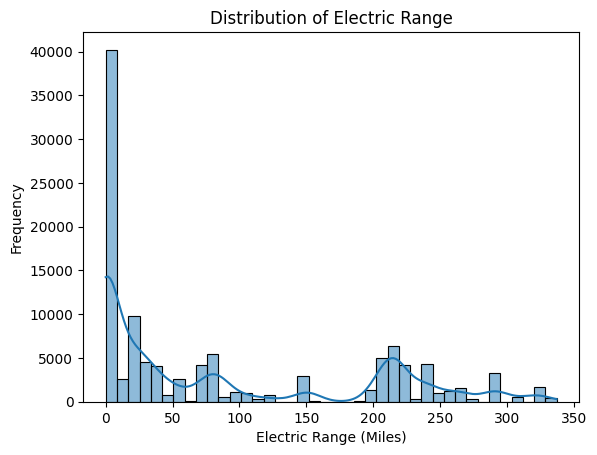

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data=df.Electric_Range, kde=True)
plt.gca().set_title("Distribution of Electric Range")
plt.gca().set_xlabel("Electric Range (Miles)")
plt.gca().set_ylabel("Frequency")
plt.show()


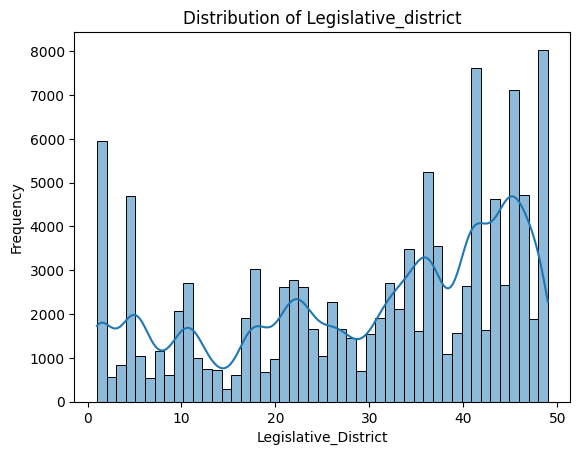

In [82]:
sns.histplot(data=df.Legislative_District, kde=True)
plt.gca().set_title("Distribution of Legislative_district")
plt.gca().set_xlabel("Legislative_District")
plt.gca().set_ylabel("Frequency")
plt.show()


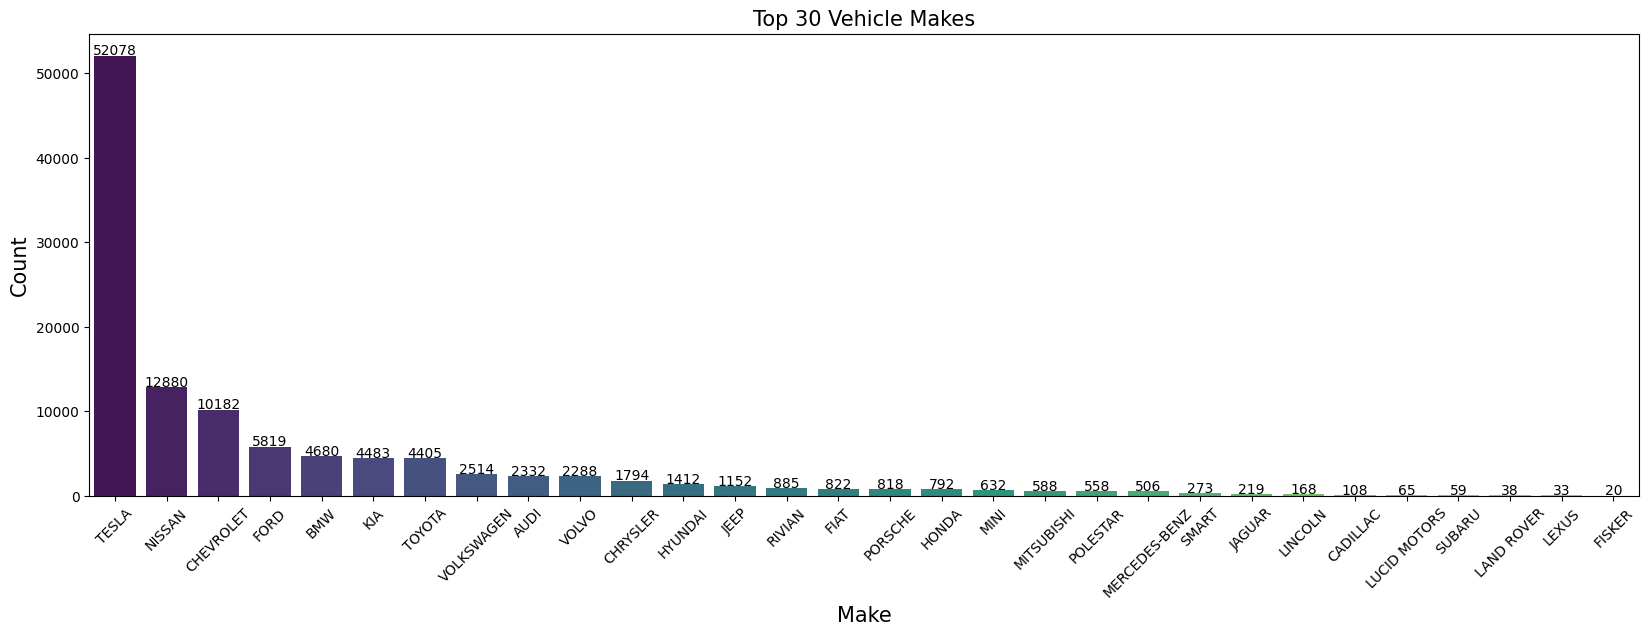

In [88]:
plt.figure(figsize = (20,6))
top_makes = df["Make"].value_counts().nlargest(30)
sns.barplot(x=top_makes.index, y=top_makes.values, hue=top_makes.index, palette='viridis', legend=False)
for index, value in enumerate(top_makes.values):
 plt.text(index, value + 100, str(value), ha= "center", fontsize = 10)
plt.gca().set_title("Top 30 Vehicle Makes", fontsize = 15)
plt.gca().set_xlabel("Make",fontsize=15)
plt.gca().set_ylabel("Count", fontsize=15)
plt.xticks(rotation=45)
plt.show()


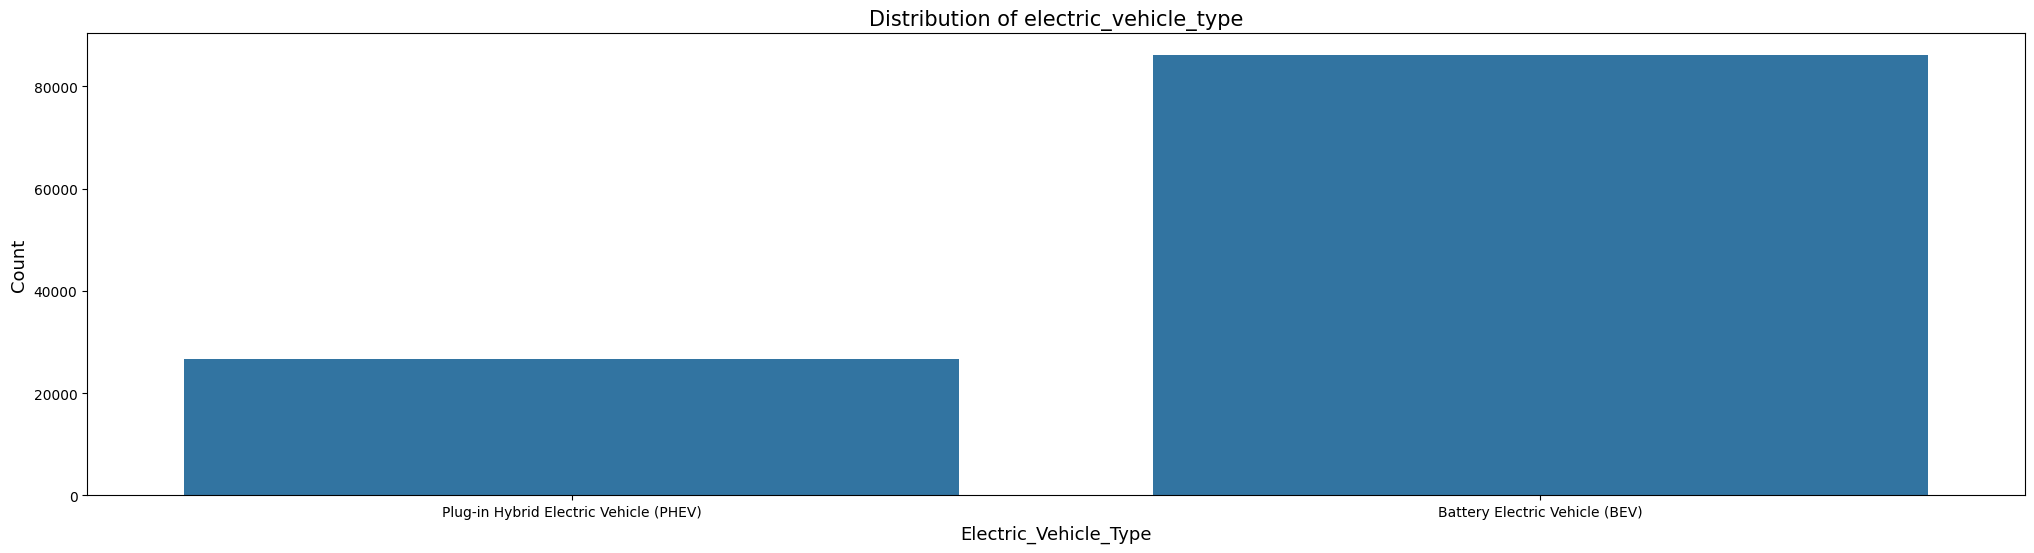

In [92]:
plt.figure(figsize=(25,6))
sns.countplot(x="Electric_Vehicle_Type",data=df)
plt.gca().set_title("Distribution of electric_vehicle_type",fontsize = 15)
plt.gca().set_xlabel("Electric_Vehicle_Type",fontsize = 13)
plt.gca().set_ylabel("Count",fontsize = 13)
plt.show()

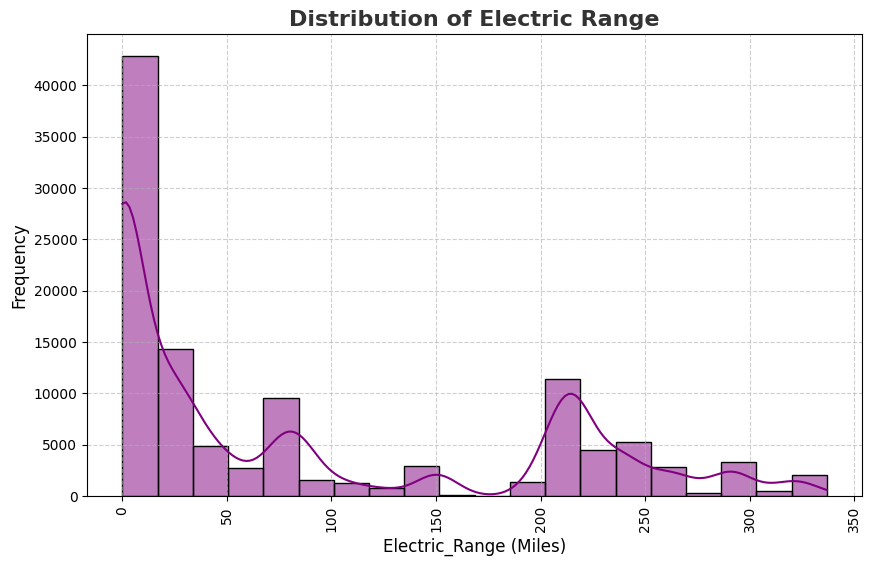

In [104]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Electric_Range'], bins=20, kde=True, color='#800080', edgecolor='black')  # New color: '#800080' (purple)
plt.title('Distribution of Electric Range', fontsize=16, fontweight='bold', color='#333')
plt.xlabel('Electric_Range (Miles)', fontsize=12, fontweight='medium')
plt.ylabel('Frequency', fontsize=12, fontweight='medium')
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

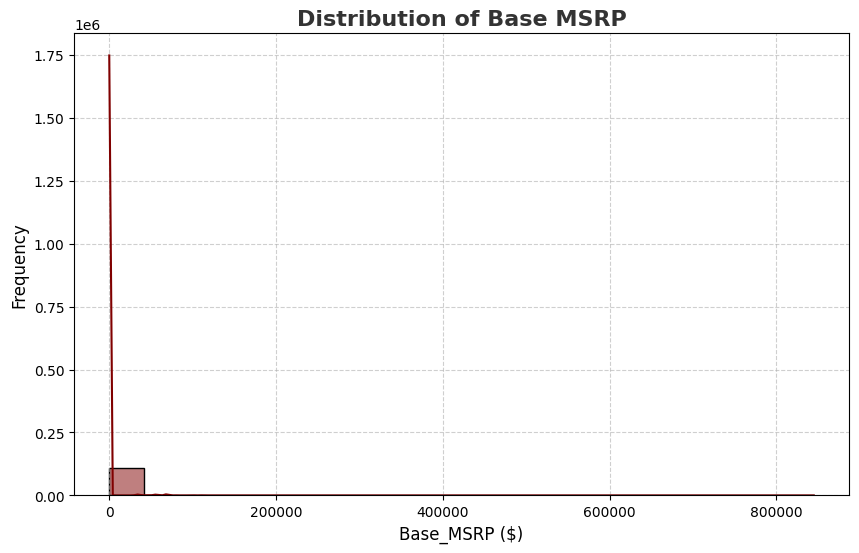

In [108]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Base_MSRP'], bins=20, kde=True, color='#800000', edgecolor='black')  # New color: '#800000' (maroon)
plt.title('Distribution of Base MSRP', fontsize=16, fontweight='bold', color='#333')
plt.xlabel('Base_MSRP ($)', fontsize=12, fontweight='medium')
plt.ylabel('Frequency', fontsize=12, fontweight='medium')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

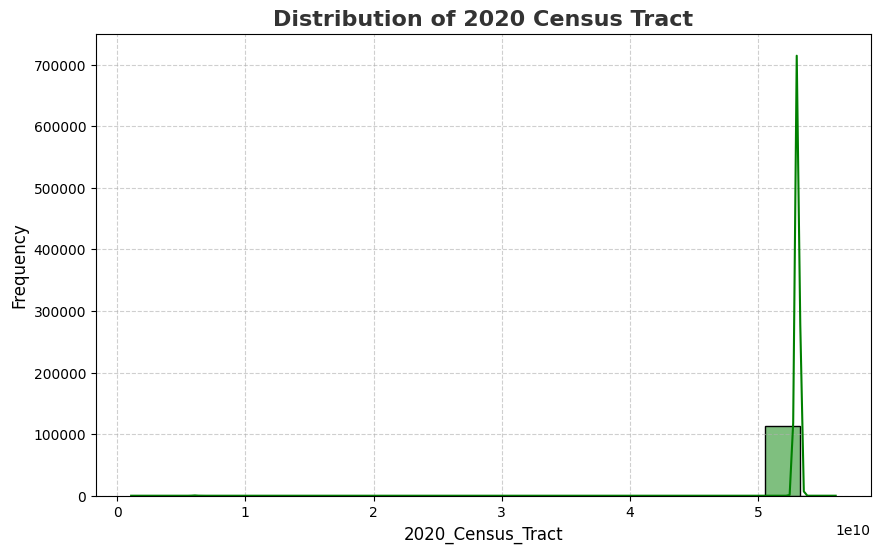

In [114]:
plt.figure(figsize=(10, 6))
sns.histplot(df['2020_Census_Tract'], bins=20, kde=True, color='#008000', edgecolor='black')  # New color: '#008000' (green)
plt.title('Distribution of 2020 Census Tract', fontsize=16, fontweight='bold', color='#333')
plt.xlabel('2020_Census_Tract', fontsize=12, fontweight='medium')
plt.ylabel('Frequency', fontsize=12, fontweight='medium')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [116]:
#Bivariate Analysis

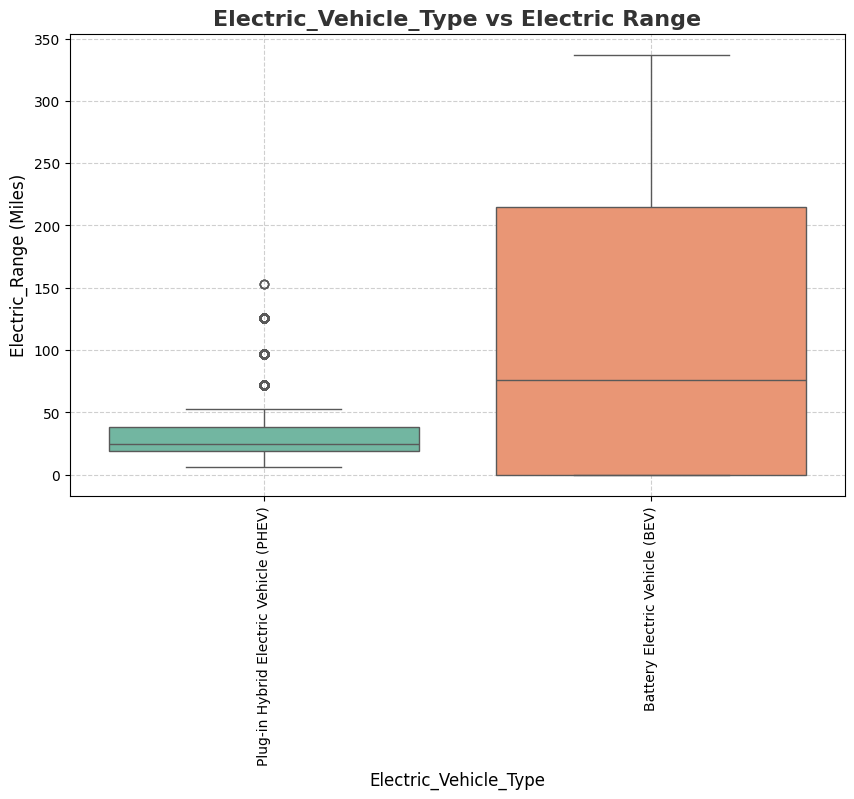

In [128]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Electric_Vehicle_Type', y='Electric_Range', data=df, hue='Electric_Vehicle_Type', palette='Set2', legend=False)
plt.title('Electric_Vehicle_Type vs Electric Range', fontsize=16, fontweight='bold', color='#333')
plt.xlabel('Electric_Vehicle_Type', fontsize=12, fontweight='medium')
plt.ylabel('Electric_Range (Miles)', fontsize=12, fontweight='medium')
plt.xticks(rotation=90, fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

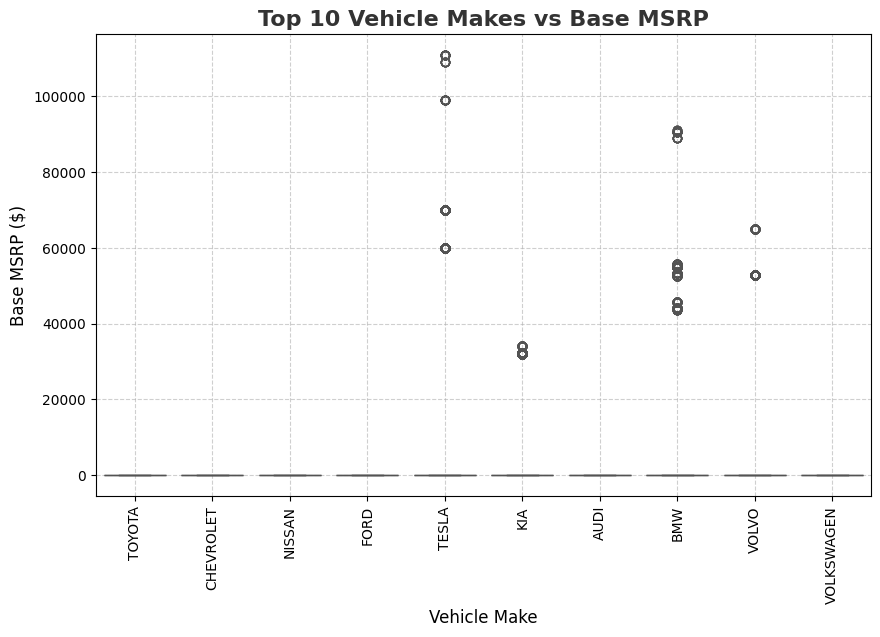

In [134]:
plt.figure(figsize=(10, 6))
top_makes = df['Make'].value_counts().nlargest(10).index
sns.boxplot(x='Make', y='Base_MSRP', data=df[df['Make'].isin(top_makes)], hue='Make', palette='coolwarm', legend=False)
plt.title('Top 10 Vehicle Makes vs Base MSRP', fontsize=16, fontweight='bold', color='#333')
plt.xlabel('Vehicle Make', fontsize=12, fontweight='medium')
plt.ylabel('Base MSRP ($)', fontsize=12, fontweight='medium')
plt.xticks(rotation=90, fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

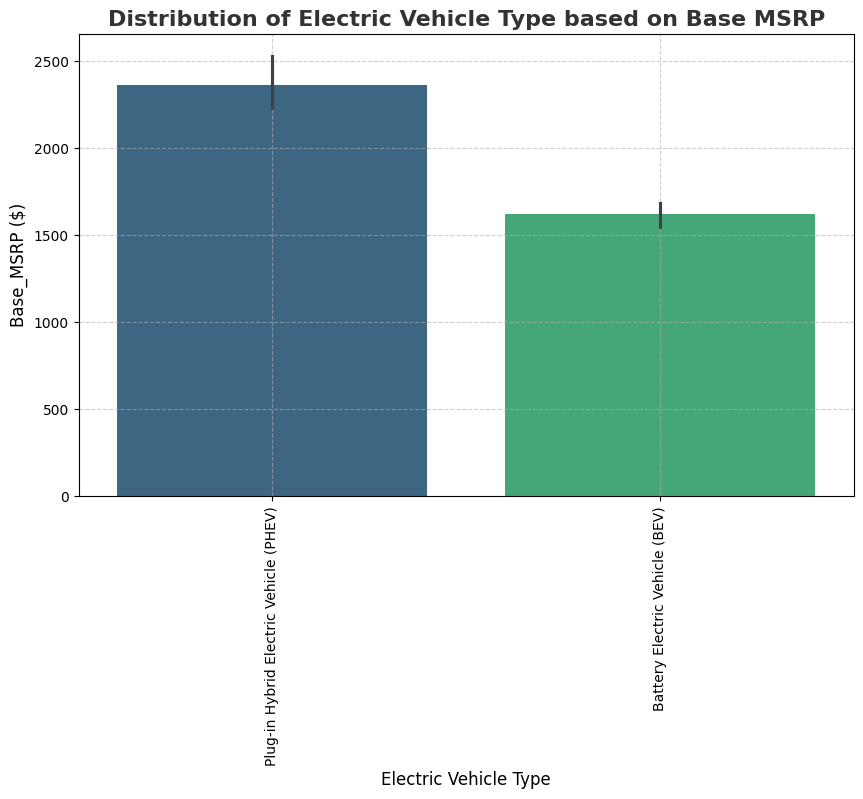

In [142]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Electric_Vehicle_Type', y='Base_MSRP', data=df, hue='Electric_Vehicle_Type', palette='viridis', legend=False)
plt.title('Distribution of Electric Vehicle Type based on Base MSRP', fontsize=16, fontweight='bold', color='#333')
plt.xlabel('Electric Vehicle Type', fontsize=12, fontweight='medium')
plt.ylabel('Base_MSRP ($)', fontsize=12, fontweight='medium')
plt.xticks(rotation=90, fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

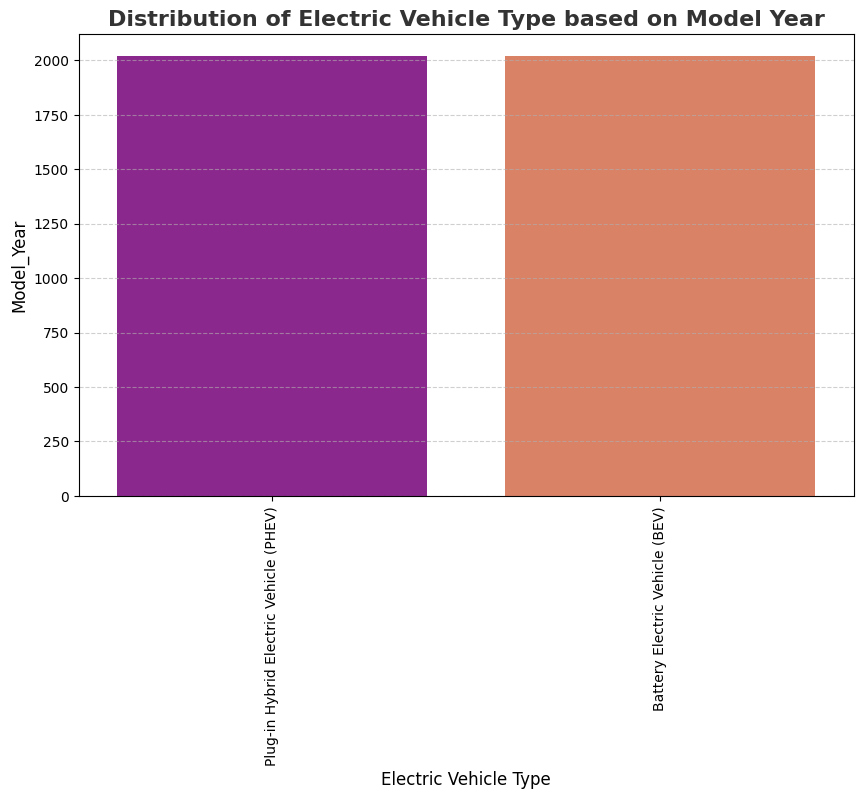

In [146]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Electric_Vehicle_Type', y='Model_Year', data=df, hue='Electric_Vehicle_Type', palette='plasma', legend=False)
plt.title('Distribution of Electric Vehicle Type based on Model Year', fontsize=16, fontweight='bold', color='#333')
plt.xlabel('Electric Vehicle Type', fontsize=12, fontweight='medium')
plt.ylabel('Model_Year', fontsize=12, fontweight='medium')
plt.xticks(rotation=90, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [148]:
#Task 2:

In [150]:
#Create a Choropleth using plotly.express to display the number of EV vehicles based on location.

In [153]:
pip install plotly

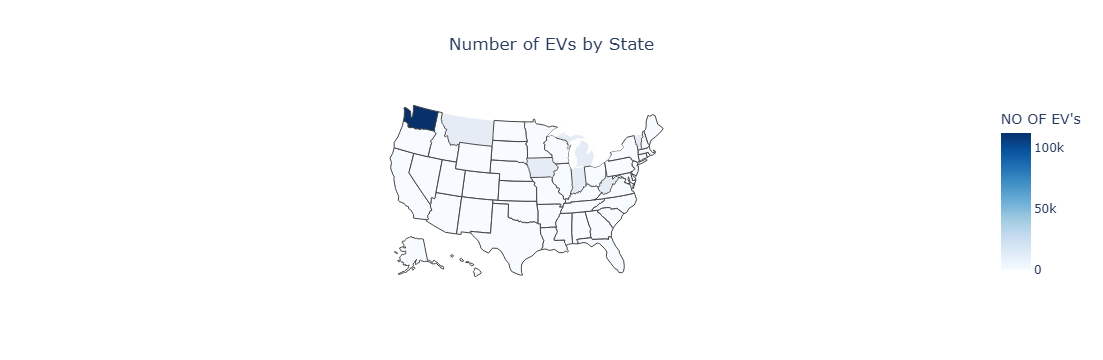

In [169]:
import plotly.express as px
# Group the data by state and count the number of EVs
count_by_state = df.groupby("State").size().reset_index(name="count")

# Create the choropleth map
fig = px.choropleth(
    count_by_state,
    locations="State",
    color="count",
    locationmode="USA-states",
    scope="usa",
    labels={"count": "NO OF EV's"},  # Correct label mapping
    title="Number of EVs by State",
    color_continuous_scale=px.colors.sequential.Blues  # Use a light color scale like 'Blues'
)

# Update layout for the map
fig.update_layout(
    geo=dict(bgcolor='rgba(0,0,0,0)'),  # Transparent background
    title_x=0.5  # Center the title
)

# Show the figure
fig.show()


In [171]:
#Task 3:

In [175]:
#Create a Racing Bar Plot to display the animation of EV Make and its count each year.

In [177]:
pip install bar-chart-race

Note: you may need to restart the kernel to use updated packages.


In [179]:
import bar_chart_race as bcr

In [190]:
# Group the data by 'make' and 'model_year', then count the number of EVs
ev_make_by_year = df.groupby(['Make', 'Model_Year']).size().reset_index(name='number_of_evs')
print(ev_make_by_year)


      Make  Model_Year  number_of_evs
0     AUDI        2016            214
1     AUDI        2017            187
2     AUDI        2018            174
3     AUDI        2019            392
4     AUDI        2020            224
..     ...         ...            ...
204  VOLVO        2019            190
205  VOLVO        2020            162
206  VOLVO        2021            580
207  VOLVO        2022            882
208  VOLVO        2023             21

[209 rows x 3 columns]


In [210]:
# Create the animated racing bar plot with annotations
fig = px.bar(ev_make_by_year,
             y='Make',  
             x='number_of_Vehicles',  
             color='Make',  
             animation_frame='Model Year',  
             orientation='h',  
             title='EV Makes and their Count Over the Years',
             labels={'Number_of_Vehicles': 'Number of EV Vehicles'},
             range_x=[0, 3000]
            )

fig.update_traces(texttemplate='%{x}',  
                  textposition='outside',  
                  textfont_size=16)  

# Adjust the layout for improved visibility and emphasis on movement
fig.update_layout(
    xaxis=dict(showgrid=True, gridcolor='LightGray'),  
    yaxis_title='EV Makes',
    xaxis_title='Number of EV Vehicles',
    showlegend=False,  
    title_x=0.5,  
    title_font=dict(size=20),  
    margin=dict(l=50, r=50, t=50, b=50),  
    width=800,  
    height=600 
)

fig.show()


ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['Make', 'Model_Year', 'number_of_evs'] but received: number_of_Vehicles